In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

In [152]:
df = pd.read_csv("./DIB_spreadsheet (CSV).csv")

In [153]:
df_copy = df.copy()

In [154]:
df_copy.shape

(496, 116)

In [155]:
# set the max columns to none
pd.set_option('display.max_columns', None)

In [156]:
df_copy.head()

NO OF RESPONDENTS  GENDER  AGE  RELIGION  MARITAL_STATUS  SPOUSE_JOB  \
0                  1       2    1         1               2           0   
1                  2       1    2         1               1           1   
2                  3       1    3         1               1           1   
3                  4       2    1         1               1           1   
4                  5       1    4         1               1           1   

   SPOUSE_JOB_NATURE  ETHINCITY  NATURE_OF_FAMILY  EDUCATIONAL_QUALIFICATION  \
0                  0          2                 2                          3   
1                  2          1                 1                          3   
2                  1          1                 1                          4   
3                  2          1                 1                          5   
4                  3          2                 1                          4   

   MONTHLY_INCOME  PRESENT_POSITION  EXPERIENCE  NATURE_OF_APPOINMENT   \
0               1                 2           2                      1   
1               2                 2           3                      1   
2               2                 1           4                      1   
3               2                 2           3                      1   
4               4                 2           4                      1   

   HOURS_SPENT_IN_BANK  NO_OF_EMPLOYEES  SATISFACTION  WORK_LIFE_BALANCE  SM1  \
0                    1               10             1                  1    2   
1                    2               10             1                  1    2   
2                    2               10             1                  1    4   
3                    2               10             1                  1    3   
4                    2               10             1                  1    3   

   SM2  SM3  SM4  SM5  SM6  SM7  SM8  SM9  SM10  FA1  FA2  FA3  FA4  FA5  FA6  \
0    2    1    1    1    3    5    4    4     2    1    2    4    3    3    3   
1    2    3    1    3    1    1    2    3     2    3    2    3    1    5    2   
2    4    2    3    2    2    2    5    2     5    5    3    5    5    3    5   
3    2    1    3    4    1    1    1    1     1    1    2    1    4    3    2   
4    2    2    1    5    2    1    1    1     2    2    2    5    2    5    2   

   FA7  FA8  FA9  FA10  FA11  FA12  FA13  SI1  SI2  SI3  SI4  SI5  SI6  SI7  \
0    4    4    3     2     5     4     5    3    3    3    2    3    2    2   
1    2    4    2     1     4     1     2    1    2    1    1    3    1    1   
2    4    5    5     2     3     1     3    5    4    5    3    5    4    2   
3    1    2    2     2     3     1     3    2    3    2    5    5    2    1   
4    5    1    5     1     5     3     1    3    3    3    3    5    1    1   

   SI8  H1  H2  H3  H4  H5  H6  H7  H8  WS1  WS2  WS3  WS4  WS5  WS6  WS7  \
0    5   2   4   1   4   4   1   2   2    5    4    4    3    4    4    3   
1    2   1   1   1   1   3   4   2   4    5    5    2    5    2    3    5   
2    5   1   5   2   3   2   3   4   1    5    4    3    2    4    3    2   
3    2   1   1   1   2   2   2   1   2    1    2    1    1    3    3    3   
4    1   3   1   1   1   1   1   1   4    4    4    5    3    2    2    2   

   WS8  WS9  WS10  WS11  WS12  WS13  WS14  WS15  WS16  WS17  WS18  WS19  WS20  \
0    1    5     3     2     5     4     5     4     3     5     4     4     4   
1    1    3     2     4     5     2     4     3     3     5     5     4     5   
2    1    3     5     5     5     5     5     3     2     5     5     5     5   
3    1    1     2     2     2     4     3     1     1     3     4     3     5   
4    1    1     3     3     5     5     3     4     4     5     4     4     4   

   WS21  WS22  WS23  WS24  WS25  WS26  WS27  WS28  WS29  PE1  PE2  PE3  PE4  \
0     4     5     4     4     4     1     1     2     1    2    2    2    1   
1     5     5     5     4     5     5     3     5     5    2    1    

In [157]:
df['WORK_LIFE_BALANCE'].value_counts()

WORK_LIFE_BALANCE
1    277
2    219
Name: count, dtype: int64

In [158]:
#percentage of each category
100*df['WORK_LIFE_BALANCE'].value_counts()/len(df['WORK_LIFE_BALANCE'])

WORK_LIFE_BALANCE
1    55.846774
2    44.153226
Name: count, dtype: float64

In [159]:
df['SATISFACTION'].value_counts()

SATISFACTION
1    307
2    189
Name: count, dtype: int64

In [160]:
#percentage of each category
100*df['SATISFACTION'].value_counts()/len(df['SATISFACTION'])

SATISFACTION
1    61.895161
2    38.104839
Name: count, dtype: float64

In [179]:
df_job_s_opportunity = df_copy[['AGE','GENDER','RELIGION','MARITAL_STATUS','EXPERIENCE','SPOUSE_JOB','SPOUSE_JOB_NATURE','ETHINCITY','SATISFACTION','PRESENT_POSITION','MONTHLY_INCOME','EDUCATIONAL_QUALIFICATION','WLB1','WLB2','WLB3','WLB4','WLB5','WLB6','WLB7','WLB8','WLB9','WLB10','WLB11','WLB12','WLB13','WORK_LIFE_BALANCE']].copy()

In [180]:
df_job_s_opportunity.head()

AGE  GENDER  RELIGION  MARITAL_STATUS  EXPERIENCE  SPOUSE_JOB  \
0    1       2         1               2           2           0   
1    2       1         1               1           3           1   
2    3       1         1               1           4           1   
3    1       2         1               1           3           1   
4    4       1         1               1           4           1   

   SPOUSE_JOB_NATURE  ETHINCITY  SATISFACTION  PRESENT_POSITION  \
0                  0          2             1                 2   
1                  2          1             1                 2   
2                  1          1             1                 1   
3                  2          1             1                 2   
4                  3          2             1                 2   

   MONTHLY_INCOME  EDUCATIONAL_QUALIFICATION  WLB1  WLB2  WLB3  WLB4  WLB5  \
0               1                          3     2     3     3     3     4   
1               2                          3     4     2     4     4     2   
2               2                          4     5     2     2     5     4   
3               2                          5     2     2     2     2     4   
4               4                          4     3     1     2     5     4   

   WLB6  WLB7  WLB8  WLB9  WLB10  WLB11  WLB12  WLB13  WORK_LIFE_BALANCE  
0     4     4     2     4      3      3      3      1                  1  
1     3     2     2     4      2      4      4      2                  1  
2     3     2     5     2      3      5      4      3                  1  
3     4     3     2     3      3      2      2      2                  1  
4     4     2     3     4      2      4      5      2                  1

In [181]:
df_job_s_opportunity.shape

(496, 26)

In [182]:
df_job_s_opportunity['WORK_LIFE_BALANCE'].value_counts()

WORK_LIFE_BALANCE
1    277
2    219
Name: count, dtype: int64

In [183]:
x=df_job_s_opportunity.drop('WORK_LIFE_BALANCE', axis=1)
x

AGE  GENDER  RELIGION  MARITAL_STATUS  EXPERIENCE  SPOUSE_JOB  \
0      1       2         1               2           2           0   
1      2       1         1               1           3           1   
2      3       1         1               1           4           1   
3      1       2         1               1           3           1   
4      4       1         1               1           4           1   
..   ...     ...       ...             ...         ...         ...   
491    1       2         1               2           3           0   
492    3       1         2               1           2           1   
493    1       2         1               2           4           0   
494    2       1         2               1           2           2   
495    4       1         1               1           3           1   

     SPOUSE_JOB_NATURE  ETHINCITY  SATISFACTION  PRESENT_POSITION  \
0                    0          2             1                 2   
1                    2          1             1                 2   
2                    1          1             1                 1   
3                    2          1             1                 2   
4                    3          2             1                 2   
..                 ...        ...           ...               ...   
491                  0          1             1                 1   
492                  2          2             2                 2   
493                  0          1             1                 1   
494                  0          1             2                 3   
495                  2          2             1                 2   

     MONTHLY_INCOME  EDUCATIONAL_QUALIFICATION  WLB1  WLB2  WLB3  WLB4  WLB5  \
0                 1                          3     2     3     3     3     4   
1                 2                          3     4     2     4     4     2   
2                 2                          4     5     2     2     5     4   
3                 2                          5     2     2     2     2     4   
4                 4                          4     3     1     2     5     4   
..              ...                        ...   ...   ...   ...   ...   ...   
491               2                          3     3     2     2     3     2   
492               4                          3     5     4     5     4     4   
493               2                          3     2     2     1     4     4   
494               1                          3     4     4     4     4     3   
495               2                          3     2     1     1     3     4   

     WLB6  WLB7  WLB8  WLB9  WLB10  WLB11  WLB12  WLB13  
0       4     4     2     4      3      3      3      1  
1       3     2     2     4      2      4      4      2  
2       3     2     5     2      3      5      4      3  
3       4     3     2     3      3      2      2      2  
4       4     2     3     4      2      4      5      2  
..    ...   ...   ...   ...    ...    ...    ...    ...  
491     2     3     1     3      2      1      1      3  
492     3     2     3     5      3      4      3      5  
493     4     3     4     3      2      5      5      2  
494     4     3     4     3      3      3      4      2  
495     4     2     3     3      1      4      5      3  

[496 rows x 25 columns]

In [184]:
y=df_job_s_opportunity['WORK_LIFE_BALANCE']
y = y.map({1:1, 2:0})

In [185]:
y.value_counts()

WORK_LIFE_BALANCE
1    277
0    219
Name: count, dtype: int64

In [186]:
100*y.value_counts()/len(y)

WORK_LIFE_BALANCE
1    55.846774
0    44.153226
Name: count, dtype: float64

<BarContainer object of 2 artists>

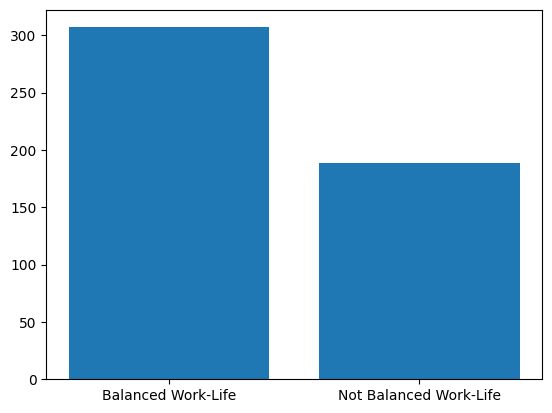

In [187]:
class_names = ['Balanced Work-Life', 'Not Balanced Work-Life']
plt.bar(class_names, df['SATISFACTION'].value_counts())

In [188]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(x, y)

In [189]:
y_resampled.value_counts()

WORK_LIFE_BALANCE
1    62
0    57
Name: count, dtype: int64

<BarContainer object of 2 artists>

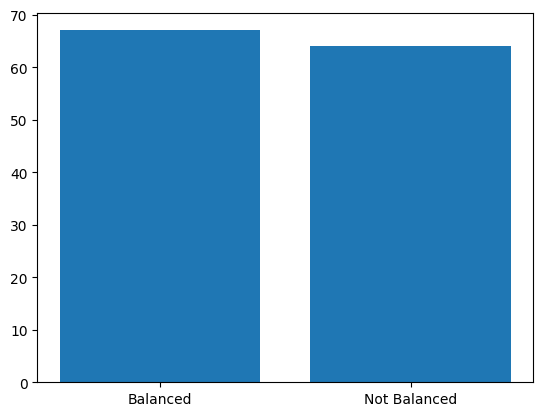

In [85]:
class_names = ['Balanced', 'Not Balanced']
plt.bar(class_names, y_resampled.value_counts())

In [85]:
100*y_resampled.value_counts()/len(y_resampled)

WORK_LIFE_BALANCE
0    52.054795
1    47.945205
Name: count, dtype: float64

In [86]:
# x_resampled['WORK_LIFE_BALANCE'].value_counts()

In [87]:
#percentage of each category
# 100*x_resampled['WORK_LIFE_BALANCE'].value_counts()/len(x_resampled['WORK_LIFE_BALANCE'])

In [88]:
x_resampled.shape

(146, 25)

In [190]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size = 0.2, random_state=42)

standard_scaler = StandardScaler()
standard_scaler_fit=standard_scaler.fit(x_train)
x_train=standard_scaler_fit.transform(x_train)
x_test=standard_scaler_fit.transform(x_test)

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size = 0.2, random_state=42)


In [191]:
n_components = 1  # Choose the number of components you want to keep
lda = LinearDiscriminantAnalysis(n_components=n_components)
x_train_lda = lda.fit_transform(x_train, y_train)
x_test_lda = lda.transform(x_test)

# # Apply PCA for dimensionality reduction
# n_components = 10
# pca = PCA(n_components=n_components)
# x_train_pca = pca.fit_transform(x_train)
# x_test_pca = pca.transform(x_test)

In [91]:
# Create the SVM classifier
svm_classifier = SVC()

# Define the hyperparameter grid to search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model with hyperparameter tuning on the training data
grid_search.fit(x_train_lda, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions on testing data
best_svm_model = grid_search.best_estimator_
svm_pred = best_svm_model.predict(x_test_lda)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, svm_pred))
print(metrics.confusion_matrix(y_test, svm_pred))

# Printing the Overall Accuracy of the model
accuracy = metrics.accuracy_score(y_test, svm_pred)
print('Accuracy of the SVM model on Testing Sample Data:', round(accuracy, 2))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Hyperparameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.92      0.85      0.88        13

    accuracy                           0.90        30
   macro avg       0.90      0.89      0.90        30
weighted avg       0.90      0.90      0.90        30

[[16  1]
 [ 2 11]]
Accuracy of the SVM model on Testing Sample Data: 0.9


In [94]:

# Create the XGBoost classifier
xgb_classifier = XGBClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [3, 5, 7, 10, 12, 15],
    'learning_rate': [0.1, 0.06, 0.05, 0.01],
    'n_estimators': [50, 100, 200],
    'booster': ['gbtree', 'gblinear', 'dart']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model with hyperparameter tuning on the training data
grid_search.fit(x_train_lda, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions on testing data
best_xgb_model = grid_search.best_estimator_
xgb_pred = best_xgb_model.predict(x_test_lda)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, xgb_pred))
print(metrics.confusion_matrix(y_test, xgb_pred))

# Printing the Overall Accuracy of the model
accuracy = metrics.accuracy_score(y_test, xgb_pred)
print('Accuracy of the XGBoost model on Testing Sample Data:', round(accuracy, 2))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[03:29:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_depth" } are not used.

[03:29:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_depth" } are not used.

[03:29:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_depth" } are not used.

[03:29:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_depth" } are not used.

[03:29:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\l

In [149]:
model_rf = RandomForestClassifier(max_depth=5, n_estimators=100, criterion='entropy')

# Creating the model on Training Data
model_rf_fit=model_rf.fit(x_train,y_train)
model_rf_pred=model_rf_fit.predict(x_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, model_rf_pred))
print(metrics.confusion_matrix(y_test, model_rf_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, model_rf_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.92      0.85      0.88        13

    accuracy                           0.90        30
   macro avg       0.90      0.89      0.90        30
weighted avg       0.90      0.90      0.90        30

[[16  1]
 [ 2 11]]
Accuracy of the model on Testing Sample Data: 0.9


In [192]:
model_xgb = XGBClassifier(max_depth=15, learning_rate=0.1, n_estimators=250, booster='gbtree', gamma=4)

# Creating the model on Training Data
model_xgb_fit=model_xgb.fit(x_train,y_train)
model_xgb_pred=model_xgb_fit.predict(x_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, model_xgb_pred))
print(metrics.confusion_matrix(y_test, model_xgb_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, model_xgb_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.79      0.92      0.85        12

    accuracy                           0.83        24
   macro avg       0.84      0.83      0.83        24
weighted avg       0.84      0.83      0.83        24

[[ 9  3]
 [ 1 11]]
Accuracy of the model on Testing Sample Data: 0.83


In [127]:
x

AGE  GENDER  RELIGION  MARITAL_STATUS  EXPERIENCE  SPOUSE_JOB  \
0      1       2         1               2           2           0   
1      2       1         1               1           3           1   
2      3       1         1               1           4           1   
3      1       2         1               1           3           1   
4      4       1         1               1           4           1   
..   ...     ...       ...             ...         ...         ...   
491    1       2         1               2           3           0   
492    3       1         2               1           2           1   
493    1       2         1               2           4           0   
494    2       1         2               1           2           2   
495    4       1         1               1           3           1   

     SPOUSE_JOB_NATURE  ETHINCITY  SATISFACTION  PRESENT_POSITION  \
0                    0          2             1                 2   
1                    2          1             1                 2   
2                    1          1             1                 1   
3                    2          1             1                 2   
4                    3          2             1                 2   
..                 ...        ...           ...               ...   
491                  0          1             1                 1   
492                  2          2             2                 2   
493                  0          1             1                 1   
494                  0          1             2                 3   
495                  2          2             1                 2   

     MONTHLY_INCOME  EDUCATIONAL_QUALIFICATION  WLB1  WLB2  WLB3  WLB4  WLB5  \
0                 1                          3     2     3     3     3     4   
1                 2                          3     4     2     4     4     2   
2                 2                          4     5     2     2     5     4   
3                 2                          5     2     2     2     2     4   
4                 4                          4     3     1     2     5     4   
..              ...                        ...   ...   ...   ...   ...   ...   
491               2                          3     3     2     2     3     2   
492               4                          3     5     4     5     4     4   
493               2                          3     2     2     1     4     4   
494               1                          3     4     4     4     4     3   
495               2                          3     2     1     1     3     4   

     WLB6  WLB7  WLB8  WLB9  WLB10  WLB11  WLB12  WLB13  
0       4     4     2     4      3      3      3      1  
1       3     2     2     4      2      4      4      2  
2       3     2     5     2      3      5      4      3  
3       4     3     2     3      3      2      2      2  
4       4     2     3     4      2      4      5      2  
..    ...   ...   ...   ...    ...    ...    ...    ...  
491     2     3     1     3      2      1      1      3  
492     3     2     3     5      3      4      3      5  
493     4     3     4     3      2      5      5      2  
494     4     3     4     3      3      3      4      2  
495     4     2     3     3      1      4      5      3  

[496 rows x 25 columns]

In [193]:
import shap
shap.initjs()


In [129]:
import lime
from lime import lime_tabular

In [193]:
test_1 = x_train.iloc[3]
test_2 = x_train.iloc[100]
test_3 = x_train.iloc[8]

lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train),
    feature_names=x_train.columns,
    class_names=['not balanced ', 'balanced'],
    mode='classification', verbose=True
)


In [178]:
lime_exp = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=model_rf_fit.predict_proba, num_features=11)


Intercept 0.23783787618682833
Prediction_local [0.90735455]
Right: 0.9509974553883223


In [194]:
lime_exp_1 = lime_explainer.explain_instance(
    data_row=test_2,
    predict_fn=model_xgb_fit.predict_proba, num_features=11
)

Intercept 0.5500082875269924
Prediction_local [0.36683932]
Right: 0.21486223


In [180]:
lime_exp_2 = lime_explainer.explain_instance(
    data_row=test_3,
    predict_fn=model_xgb_fit.predict_proba, num_features=11
)

Intercept 0.45004761922890657
Prediction_local [0.42923525]
Right: 0.310675


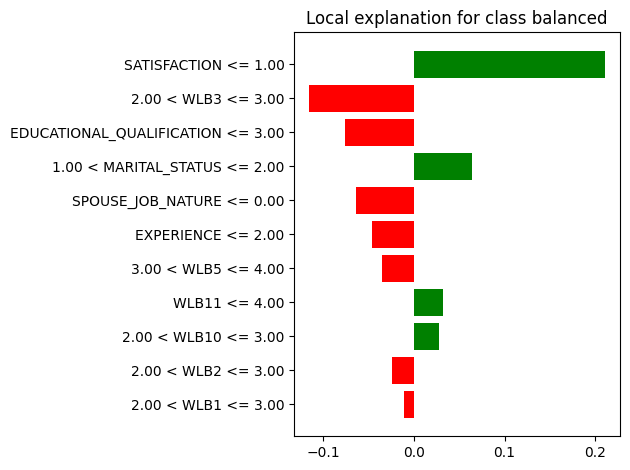

In [167]:
plt=lime_exp_2.as_pyplot_figure()
plt.tight_layout()

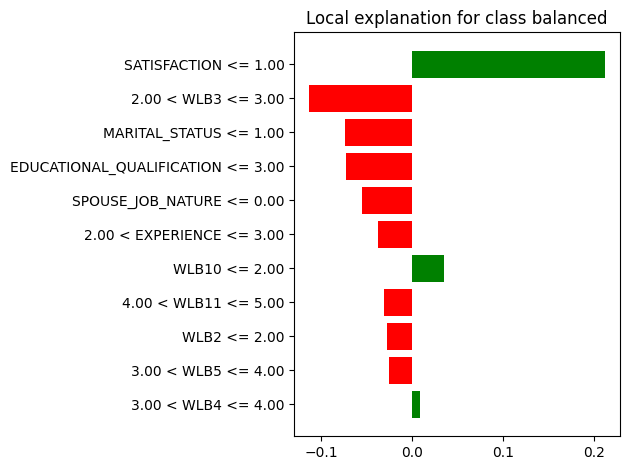

In [195]:
plt=lime_exp_1.as_pyplot_figure()
plt.tight_layout()

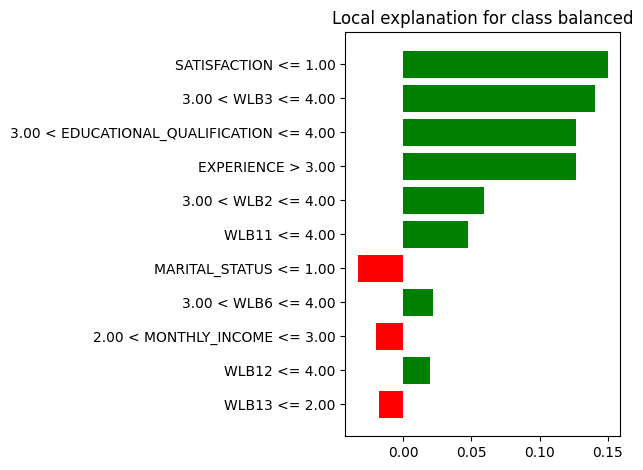

In [169]:
plt=lime_exp.as_pyplot_figure()
plt.tight_layout()

In [196]:
lime_exp_1.show_in_notebook(show_table=True)


In [173]:
lime_exp.show_in_notebook(show_table=True)


In [194]:
shap_explainer = shap.TreeExplainer(model_xgb_fit)
shap_values = shap_explainer.shap_values(x_resampled)

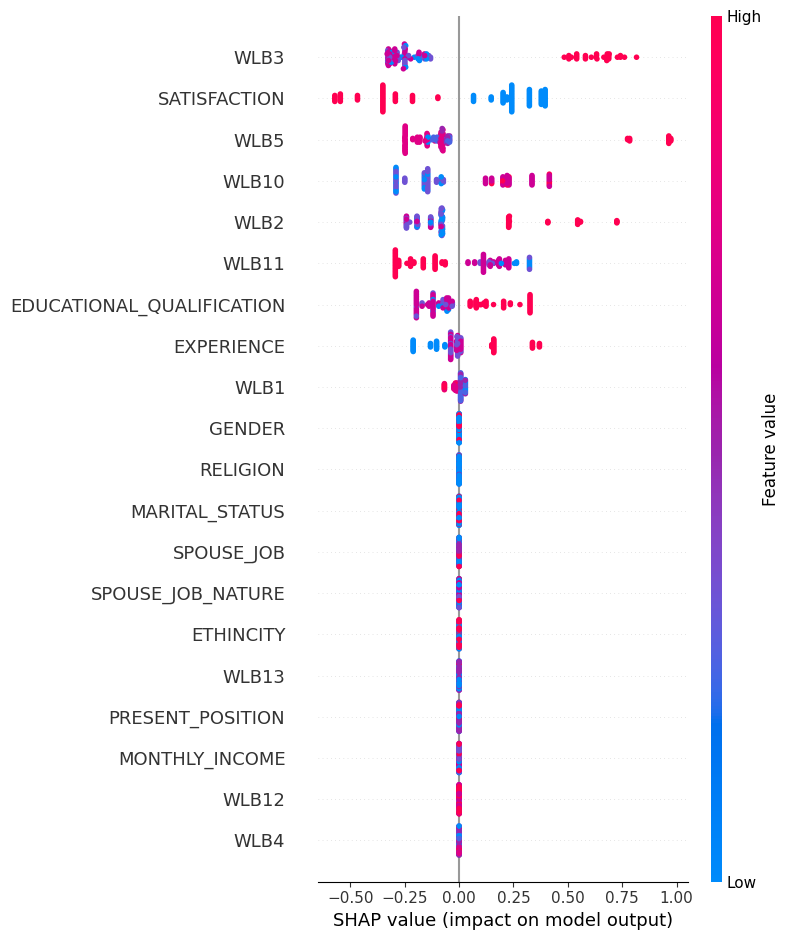

In [195]:
shap.summary_plot(shap_values, x_resampled)

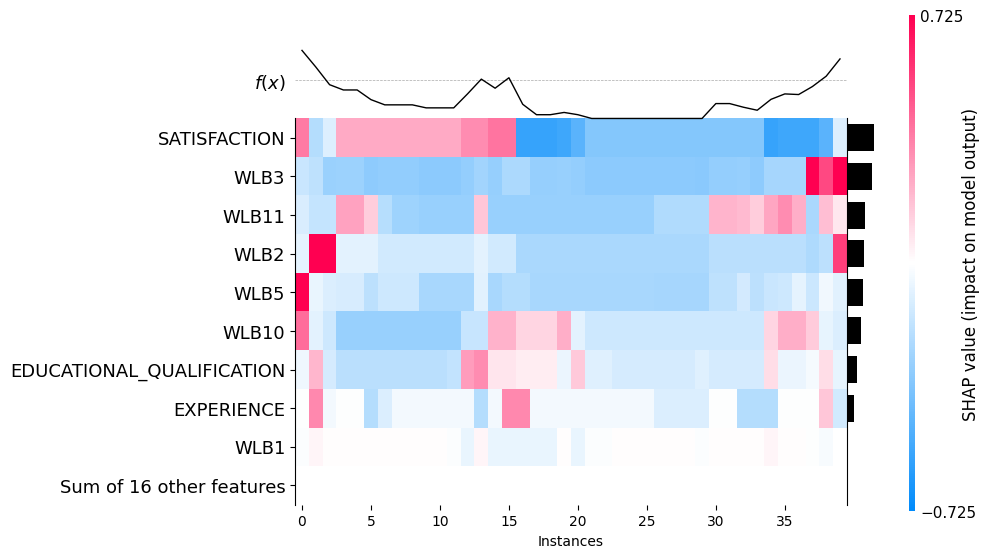

In [197]:
shap_values1 = shap_explainer(x_resampled[:40])
shap.plots.heatmap(shap_values1)

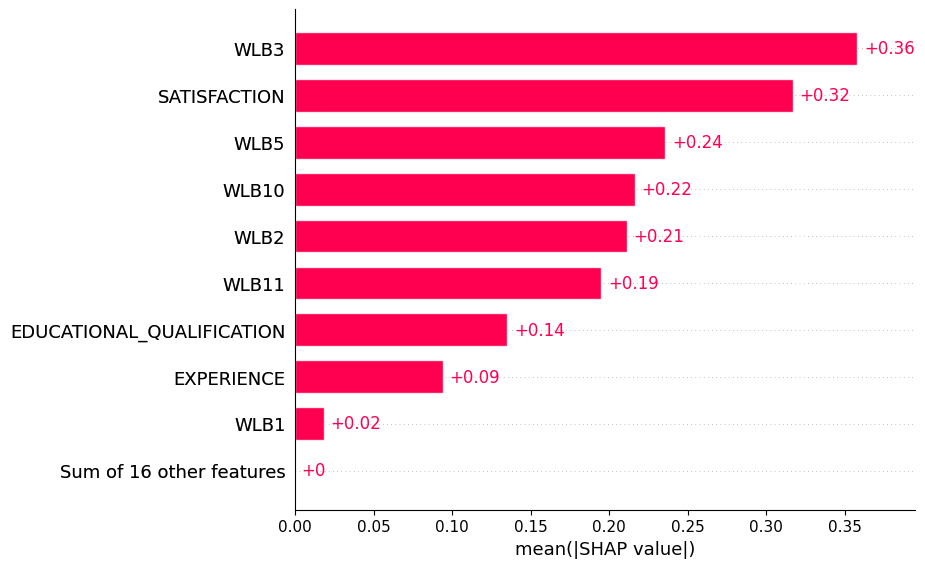

In [199]:
explainer = shap.Explainer(model_xgb_fit)
shap_values = explainer(x_resampled)
shap.plots.bar(shap_values, max_display = 10)

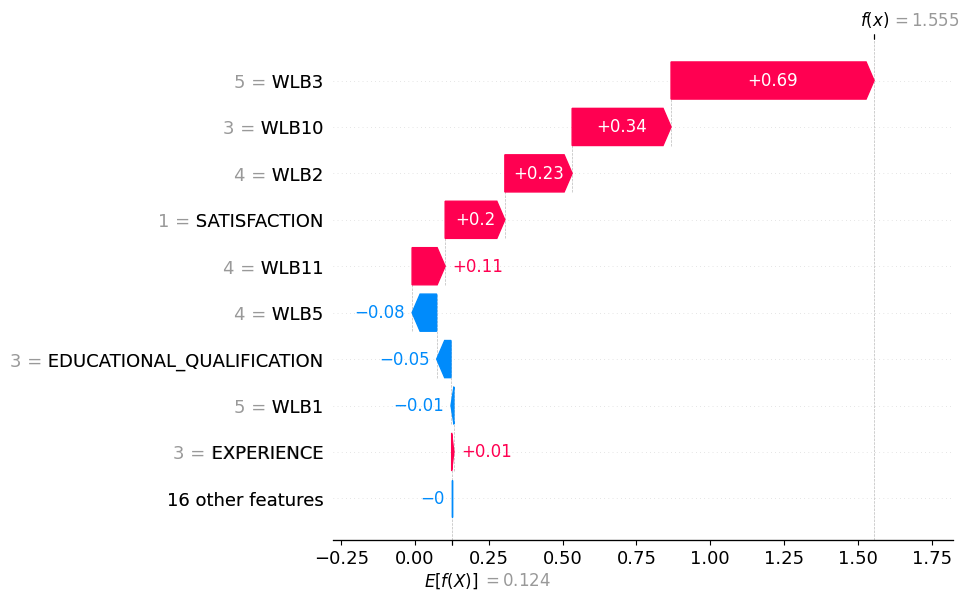

In [201]:
shap_values2 = shap_explainer(x_resampled)
shap.plots.waterfall(shap_values2[78])